## Jupyter data science workflow

In [1]:
import urllib
import pandas as pd
%matplotlib inline

In [2]:
data_url = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv'

In [3]:
urllib.urlretrieve(data_url, 'Freemont.csv')

('Freemont.csv', <httplib.HTTPMessage instance at 0x1097df368>)

In [4]:
!head Freemont.csv

Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
10/03/2012 12:00:00 AM,9,4
10/03/2012 01:00:00 AM,6,4
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,3,2
10/03/2012 04:00:00 AM,1,6
10/03/2012 05:00:00 AM,10,21
10/03/2012 06:00:00 AM,50,105
10/03/2012 07:00:00 AM,95,257
10/03/2012 08:00:00 AM,146,291


In [5]:
df = pd.read_csv('Freemont.csv', index_col='Date', parse_dates=True)

In [6]:
df.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


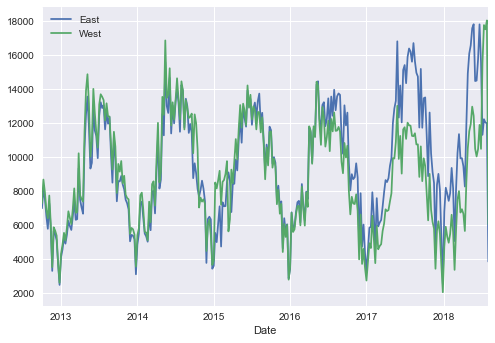

In [7]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

df.columns = ['East', 'West']

# weekly sampled
df.resample('w').sum().plot()

(0, 1077645.8500000001)

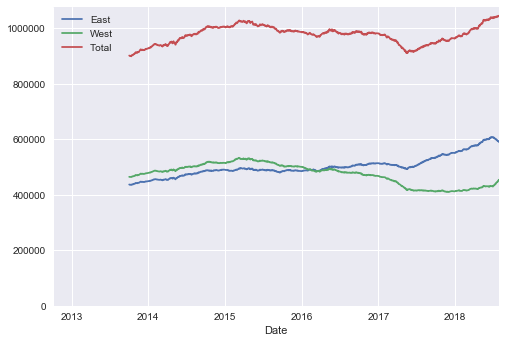

In [8]:
df['Total'] = df['East'] + df['West']

# daily sampled and rolling sum over year
ax = df.resample('d').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

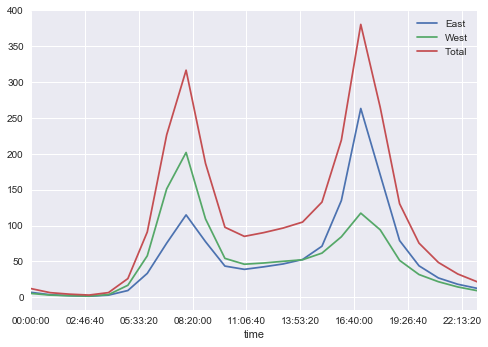

In [9]:
df.groupby(df.index.time).mean().plot()

In [10]:
pivoted = df.pivot_table('Total', index=df.index.time, columns=df.index.date)

In [11]:
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


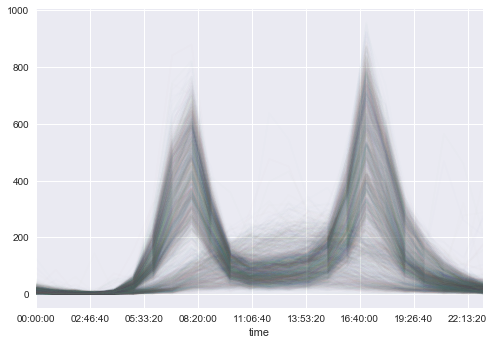

In [12]:
pivoted.plot(legend=False, alpha=0.01)

Probably, lines with the commute pattern are weekdays and those without are weekends.